In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import datetime as dt

In [4]:
from datetime import datetime

In [5]:
from collections import Counter

In [27]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache using fc-list. This may take a moment.


In [28]:
from IPython.display import clear_output

In [29]:
XRP_Increase = pd.read_csv('../../XRP_5min_Increase_SmallAmount_5min.csv')
XRP_Decrease = pd.read_csv('../../XRP_5min_Decrease_SmallAmount_5min.csv')

In [30]:
original_columns = ['datetime_real','date','close','high','low','open','quoteVolume','volume','weightedAverage']

In [31]:
XRP_Increase.head()

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,Increase_0.1_percent,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Increase_0.5_percent,Increase_0.6_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.2_percent,Increase_1.5_percent
0,12736,12736,0.069288,1493875200,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900,...,1493875500,1493875500,1493875500,1493875500,1493875500,1493875500,1493875500,1493881200,1493881500,1493881500
1,12737,12737,0.069100,1493875500,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558,...,1493875800,1493876700,1493876700,1493876700,1493876700,1493877000,1493881200,1493881200,1493881200,1493881500
2,12738,12738,0.068000,1493875800,0.069100,0.067500,0.069000,220670.240024,15126.256548,0.068547,...,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876400
3,12739,12739,0.068465,1493876100,0.068465,0.066432,0.067800,271144.858354,18298.825581,0.067487,...,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400,1493876400
4,12740,12740,0.068646,1493876400,0.068646,0.067517,0.067802,595249.214904,40678.358104,0.068338,...,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700,1493876700


In [32]:
np.array( [1,2,3,4,5,6])*0.1

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

In [33]:
# for n in np.array( [1,2,3,4,5,6,8,10])*0.1:
#     XRP_Increase['shift_open_{}'.format(n)] = XRP_Increase['Increase_{}_percent'.format(n)].shift(1)

for 0.6% incraese:

how many continous increase are there?

In [34]:
# XRP_Increase['diff_0.6'] = XRP_Increase['shift_open_0.6000000000000001'] - XRP_Increase['Increase_0.6000000000000001_percent']

In [35]:
#(XRP_Increase[XRP_Increase['diff_0.6'] != 0]['diff_0.6'].value_counts())/(len(XRP_Increase))

## Adjust for waiting

In [36]:
for col in ['Unnamed: 0','Unnamed: 0.1']:
    try:
        del XRP_Increase[col]
    except:
        None

In [37]:
XRP_Analysis_table = XRP_Increase

In [38]:
XRP_Analysis_table.tail()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,12H_RA_on_Close,...,Increase_0.1_percent,Increase_0.2_percent,Increase_0.3_percent,Increase_0.4_percent,Increase_0.5_percent,Increase_0.6_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.2_percent,Increase_1.5_percent
236091,0.316000,1564701300,0.316000,0.316000,0.316000,0.000000,0.000000,0.316000,2019-08-02 00:15:00,0.316311,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
236092,0.316000,1564701600,0.316000,0.316000,0.316000,103.387470,32.670411,0.316000,2019-08-02 00:20:00,0.316294,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
236093,0.316000,1564701900,0.316000,0.316000,0.316000,0.000000,0.000000,0.316000,2019-08-02 00:25:00,0.316278,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
236094,0.315153,1564702200,0.315153,0.315153,0.315153,4.613868,1.454076,0.315153,2019-08-02 00:30:00,0.316226,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
236095,0.315153,1564702500,0.315153,0.315153,0.315153,9995.386132,3150.078924,0.315153,2019-08-02 00:35:00,0.316166,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123


In [39]:
XRP_Analysis_table['20min_RA_on_Close'] = XRP_Analysis_table['close'].rolling(4).mean().shift(1)
XRP_Analysis_table['1H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(12).mean().shift(1)
XRP_Analysis_table['2H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(24).mean().shift(1)
XRP_Analysis_table['4H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(48).mean().shift(1)
XRP_Analysis_table['12H_RA_on_Close'] = XRP_Analysis_table['close'].rolling(144).mean().shift(1)

In [40]:
ra_list            =    ['20min_RA_on_Close', '1H_RA_on_Close', '2H_RA_on_Close', '4H_RA_on_Close', '12H_RA_on_Close']
buy_in_list        =    np.arange(0.002,0.022, 0.002)
stop_loss_list     =    np.arange(0.01,0.03, 0.002)
time_waiting_list  =    [2, 5, 8, 12, 16, 24] # in hours
sell_limit_list    =    np.arange(0.002,0.032, 0.002)


In [41]:
dates_cors = {  1507374600: 1511274300,
                1512774600: 1515174000,
                1515174300: 1518174000,
                1547873100: 1550872800}

In [42]:
(0.002, 0.026000000000000002, 0.002, 2, '20min_RA_on_Close', 1507374600, 1511274300)
0.002
31285.99
(0.002, 0.026000000000000002, 0.002, 5, '20min_RA_on_Close', 1507374600, 1511274300)
0.002
31285.99
(0.002, 0.026000000000000002, 0.03, 16, '20min_RA_on_Close', 1507374600, 1511274300)
0.03
31285.99
(0.002, 0.026000000000000002, 0.03, 24, '20min_RA_on_Close', 1507374600, 1511274300)
0.03
31285.99

31285.99

In [43]:
# first part

trading_data = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1547873100) &
                                  (XRP_Analysis_table['date'] <= 1550872800)]   

In [44]:
XRP_Analysis_table.head(2)

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,12H_RA_on_Close,...,Increase_0.5_percent,Increase_0.6_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.2_percent,Increase_1.5_percent,20min_RA_on_Close,1H_RA_on_Close,2H_RA_on_Close,4H_RA_on_Close
0,0.069288,1493875200,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900,2017-05-04 06:20:00,NaN,...,1493875500,1493875500,1493875500,1493881200,1493881500,1493881500,NaN,NaN,NaN,NaN
1,0.069100,1493875500,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558,2017-05-04 06:25:00,NaN,...,1493876700,1493877000,1493881200,1493881200,1493881200,1493881500,NaN,NaN,NaN,NaN


In [45]:
time_event = {}
starting_asset = 50
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.002 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.026
sell_limit = 0.004

while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= drop_limit: 
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 2*172800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [46]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [47]:
transation_log.head(3)

,Gold,XRP_Amount,action,price_action_happened
1547876400,0.00,155.1043,brought,0.321719
1547876700,50.01,0.0000,sell_profit,0.323097
1547878800,0.00,155.1394,brought,0.321733


In [48]:
(0.234144 - 0.232697)/0.232697

0.006218387001121647

In [49]:
11/5011

0.002195170624625823

In [50]:
transation_log[transation_log['action'] != 'brought']

,Gold,XRP_Amount,action,price_action_happened
1547876700,50.01,0.0,sell_profit,0.323097
1547879100,50.02,0.0,sell_profit,0.323079
1547890800,50.09,0.0,sell_profit,0.323469
1547986500,46.87,0.0,stop_loss_hit,0.310000
1547987100,47.09,0.0,sell_profit,0.316231
...,...,...,...,...
1550564400,51.71,0.0,sell_profit,0.331000
1550567100,52.10,0.0,sell_profit,0.343650
1550582400,52.34,0.0,sell_profit,0.345000
1550583900,52.41,0.0,sell_profit,0.342528


In [51]:
Counter(transation_log[transation_log['action'] != 'brought']['action'])

Counter({'sell_profit': 92, 'stop_loss_hit': 1, 'time_stop': 4})

In [52]:
1511263800

1511263800

In [53]:
XRP_Analysis_table[XRP_Analysis_table['date'] == 1511263800]

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,12H_RA_on_Close,...,Increase_0.5_percent,Increase_0.6_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.2_percent,Increase_1.5_percent,20min_RA_on_Close,1H_RA_on_Close,2H_RA_on_Close,4H_RA_on_Close
57964,0.238,1511263800,0.2391,0.237001,0.238,48247.904414,11520.403479,0.238775,2017-11-21 11:30:00,0.238886,...,1511264100,1511264100,1511264100,1511264700,1511265600,1511268300,0.237618,0.238847,0.238683,0.239119


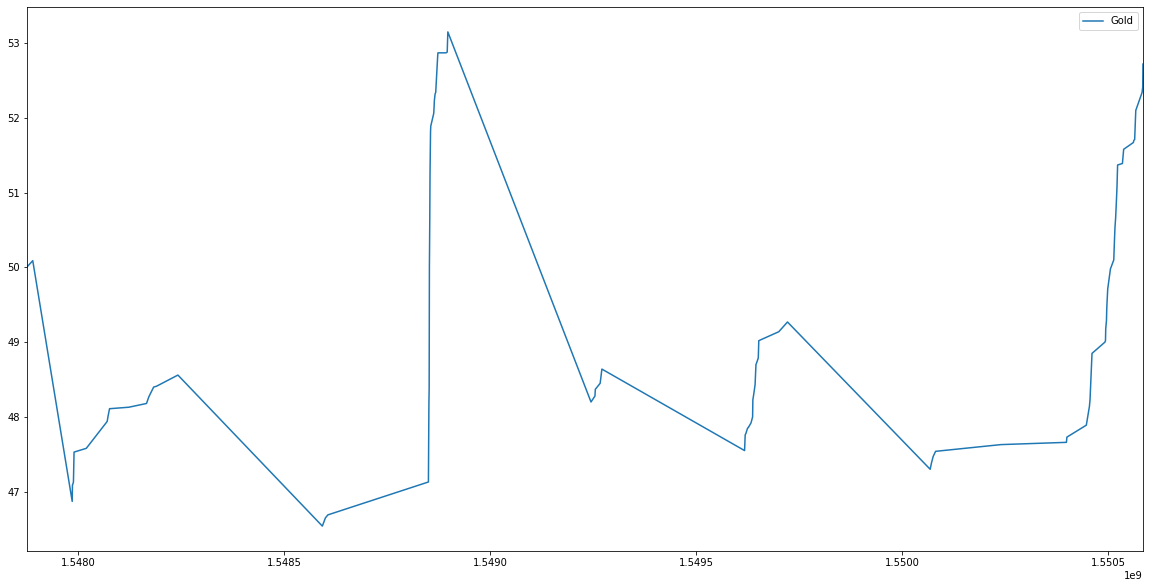

In [54]:
transation_log[transation_log['action'] != 'brought'][['Gold']].plot(figsize = (20,10))

In [55]:
1508598600

1508598600

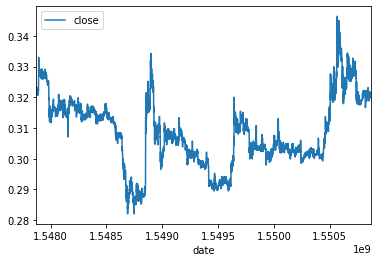

In [56]:
trading_data[['date','close']].set_index('date').plot()

In [57]:
def plotting_view(xrp_data_input , trading_log ):

#     ploting_breakdown = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
#                                            (XRP_Analysis_table['date'] <= 1511274300 )]


    transaction_display = trading_log
    transaction_display['time_start'] = transaction_display.index
    transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

    transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

    transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'black' if x == 'stop_loss_hit' else 'blue' if x == 'time_stop' else 'g')
#     transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'o' if x == 'time_stop' else x)
    
    ploting_breakdown = xrp_data_input
    plt.figure(figsize= (20,10))


    tran_y_low = ploting_breakdown['low']
    tran_y_high = ploting_breakdown['high']

    tran_y_ra = ploting_breakdown['2H_RA_on_Close']

    tran_x = ploting_breakdown['date']


    plt.plot(tran_x, tran_y_low)
    plt.plot(tran_x, tran_y_high)

    plt.plot(tran_x, tran_y_ra)

    graph_min = ploting_breakdown['low'].min() * 0.95
    graph_max = ploting_breakdown['high'].max() * 1.05

    # plotting transaction
    for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['date'].max()) &
                                           (transaction_display['time_start'] >= ploting_breakdown['date'].min()) &                      
                                           (transaction_display['action'] == 'brought')].iterrows():

        plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])

    #     plt.vlines(value['time_start'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'])
    #     plt.vlines(value['time_end'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')


    # for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
    # #     print(value['Increase_0.5_percent'])
    # #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    #     plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')


    plt.ylim(graph_min, graph_max )

    plt.xlim(ploting_breakdown['date'].min(), ploting_breakdown['date'].max())
    plt.legend()

No handles with labels found to put in legend.


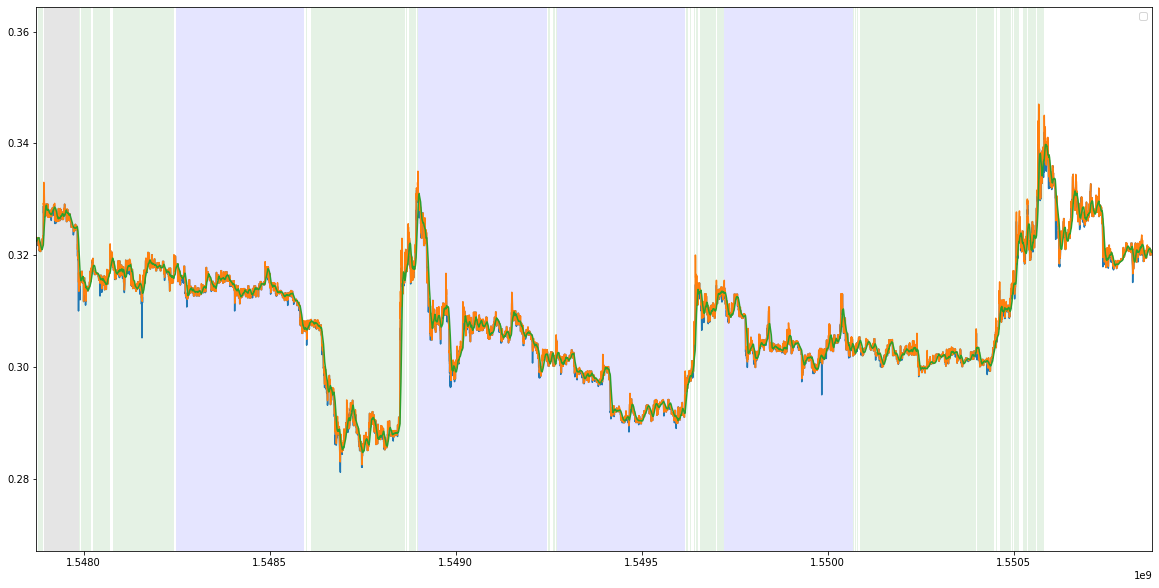

In [58]:
plotting_view(trading_data , transation_log)

In [59]:
Counter(transation_log['action'])

Counter({'brought': 98, 'sell_profit': 92, 'stop_loss_hit': 1, 'time_stop': 4})

## Real testing

In [60]:
XRP = []
for myf in open('../../../Data_storage/XRP_5min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [61]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('../../../Data_storage/Nov_5min_simulation/Coin_Data_5min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [62]:
XRP_Data = pd.concat(XRP_Data)

In [63]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [64]:
XRP_Data['20min_RA_on_Close'] = XRP_Data['close'].rolling(4).mean().shift(1)
XRP_Data['2H_RA_on_Close'] = XRP_Data['close'].rolling(24).mean().shift(1)

In [65]:
# first part

trading_data = XRP_Data[4:]

In [66]:
trading_data['datetime_real'].min(), trading_data['datetime_real'].max()

(Timestamp('2019-08-02 00:55:00'), Timestamp('2019-11-03 22:05:00'))

In [67]:
time_event = {}
starting_asset = 50
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.02
sell_limit = 0.005

while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if (( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= drop_limit ) and (df['20min_RA_on_Close'] != df['2H_RA_on_Close']): 
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 172800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [68]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [69]:
transation_log.head(3)

,Gold,XRP_Amount,action,price_action_happened
1564705500,0.00,158.7373,brought,0.314356
1564711800,50.09,0.0000,sell_profit,0.316174
1564762500,0.00,160.7694,brought,0.310930


In [70]:
(0.234144 - 0.232697)/0.232697

0.006218387001121647

In [71]:
11/5011

0.002195170624625823

In [72]:
transation_log[transation_log['action'] != 'brought']

,Gold,XRP_Amount,action,price_action_happened
1564711800,50.09,0.0,sell_profit,0.316174
1564762800,50.22,0.0,sell_profit,0.312995
1564765500,50.33,0.0,sell_profit,0.310682
1564815600,50.43,0.0,sell_profit,0.314632
1564848600,50.60,0.0,sell_profit,0.316739
...,...,...,...,...
1572555900,41.81,0.0,sell_profit,0.293673
1572588900,41.87,0.0,sell_profit,0.292653
1572619200,41.95,0.0,sell_profit,0.290102
1572624900,42.00,0.0,sell_profit,0.289082


In [73]:
Counter(transation_log[transation_log['action'] != 'brought']['action'])

Counter({'sell_profit': 367, 'time_stop': 12, 'stop_loss_hit': 41})

In [74]:
1511263800

1511263800

In [75]:
XRP_Analysis_table[XRP_Analysis_table['date'] == 1511263800]

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,12H_RA_on_Close,...,Increase_0.5_percent,Increase_0.6_percent,Increase_0.8_percent,Increase_1.0_percent,Increase_1.2_percent,Increase_1.5_percent,20min_RA_on_Close,1H_RA_on_Close,2H_RA_on_Close,4H_RA_on_Close
57964,0.238,1511263800,0.2391,0.237001,0.238,48247.904414,11520.403479,0.238775,2017-11-21 11:30:00,0.238886,...,1511264100,1511264100,1511264100,1511264700,1511265600,1511268300,0.237618,0.238847,0.238683,0.239119


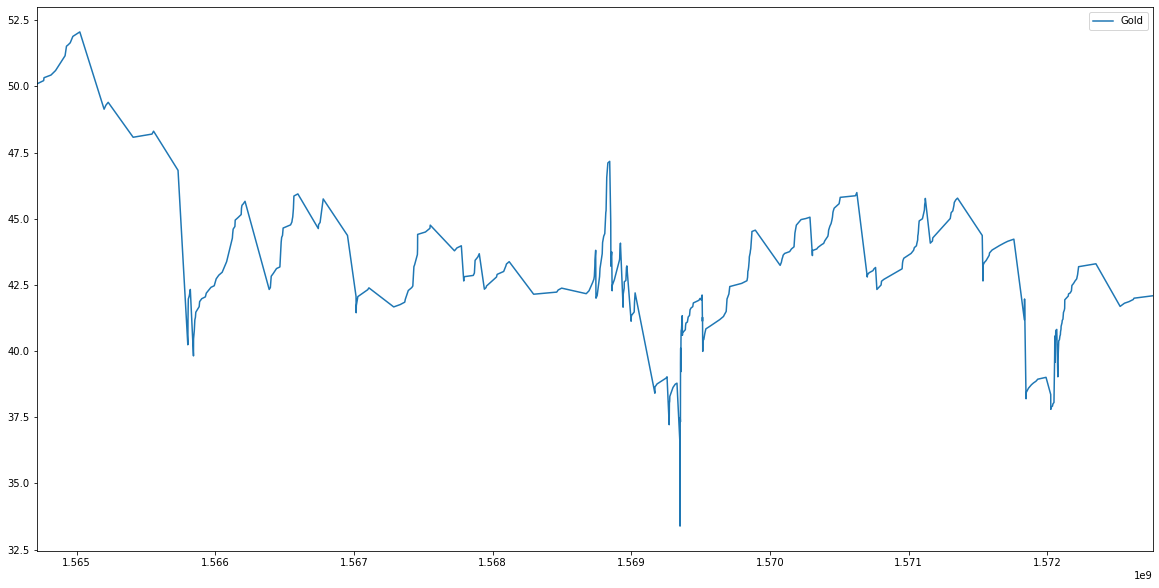

In [76]:
transation_log[transation_log['action'] != 'brought'][['Gold']].plot(figsize = (20,10))

In [77]:
1508598600

1508598600

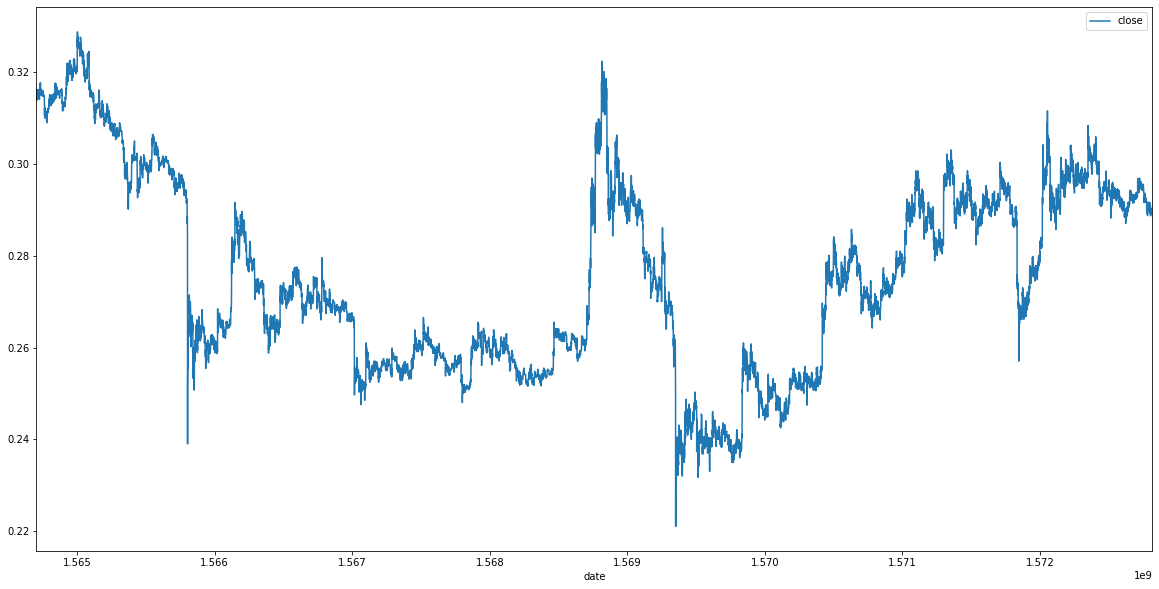

In [78]:
trading_data[['date','close']].set_index('date').plot(figsize = (20,10))

In [79]:
def plotting_view(xrp_data_input , trading_log ):

#     ploting_breakdown = XRP_Analysis_table[(XRP_Analysis_table['date'] >= 1507374600 ) &
#                                            (XRP_Analysis_table['date'] <= 1511274300 )]


    transaction_display = trading_log
    transaction_display['time_start'] = transaction_display.index
    transaction_display['time_end'] = round(transaction_display['time_start'].shift(-1), 0)

    transaction_display['action_to_color'] = transaction_display['action'].shift(-1)

    transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'black' if x == 'stop_loss_hit' else 'blue' if x == 'time_stop' else 'g')
#     transaction_display['colour_section'] = transaction_display['action_to_color'].apply(lambda x: 'o' if x == 'time_stop' else x)
    
    ploting_breakdown = xrp_data_input
    plt.figure(figsize= (20,10))


    tran_y_low = ploting_breakdown['low']
    tran_y_high = ploting_breakdown['high']

    tran_y_ra = ploting_breakdown['20min_RA_on_Close']

    tran_x = ploting_breakdown['date']


    plt.plot(tran_x, tran_y_low)
    plt.plot(tran_x, tran_y_high)

    plt.plot(tran_x, tran_y_ra)

    graph_min = ploting_breakdown['low'].min() * 0.95
    graph_max = ploting_breakdown['high'].max() * 1.05

    # plotting transaction
    for ind, value in transaction_display[ (transaction_display['time_start'] <= ploting_breakdown['date'].max()) &
                                           (transaction_display['time_start'] >= ploting_breakdown['date'].min()) &                      
                                           (transaction_display['action'] == 'brought')].iterrows():

        plt.axvspan(value['time_start'], value['time_end'], alpha = 0.1 , facecolor = value['colour_section'])

        plt.vlines(value['time_start'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'])
        plt.vlines(value['time_end'], graph_min, graph_max, alpha = 0.4, color = value['colour_section'], linestyle = 'dashed')


    # for ind, value in ploting_breakdown[ploting_breakdown['Increase_0.5_percent'] <= ploting_breakdown['date'].max()].iterrows():
    # #     print(value['Increase_0.5_percent'])
    # #     plt.vlines(value['date'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    #     plt.vlines(value['Increase_0.5_percent'], 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')


    plt.ylim(graph_min, graph_max )

    plt.xlim(ploting_breakdown['date'].min(), ploting_breakdown['date'].max())
    plt.legend()

No handles with labels found to put in legend.


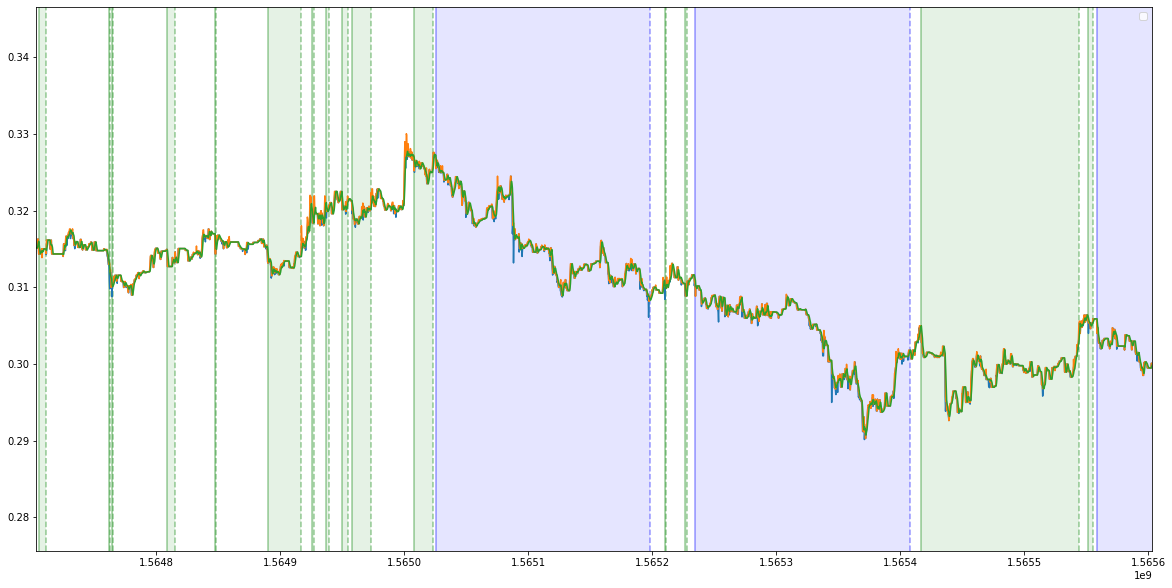

In [80]:
plotting_view(trading_data[:3000] , transation_log)